# Program for HW8

HW - 8

Name: Arush Kumar Singh

Roll No: 190182


In [256]:
#importing libraries 
import numpy as np
import math
import sys
import sympy as sym
from sympy import symbols, exp
import matplotlib.pyplot as plt 

%matplotlib inline

#setting precision upto10 digits
np.set_printoptions(precision=10)
np.set_printoptions(suppress=True)

In [257]:
#input parameters
n = 763                                           #total population 
i0 = 1                                            #initial infected population
R0 = 3.65                                          #reproductive ratio 
beta = 1.66                                       #transmission rate 
h  = 0.25                                         #step size 

In [258]:
#calculating other parameters 

gamma = beta/R0                                    #recovery rate
i0 = 1/n                                          #non dim initial infected population 
s0 = (1 - i0)                                     #initial suseptive population 
r0 = 0                                            #initial recovered population 
s0

0.9986893840104849

In [259]:
# creating an array of time with step size h
step = 100                                       # t = 0 to 100*h = 25days
arr = np.zeros(step)
gp = 0
for j in range(step):
    arr[j] = gp
    gp = gp + h

#creating arrays of SIR to store the values 
S = np.zeros(step)
I = np.zeros(step)
R = np.zeros(step)
S[0] = s0
I[0] = i0
R[0] = r0

In [260]:
#initialising variable
s = symbols('s')                                       # suseptible population
i = symbols('i')                                       # infected population
r = symbols('r')                                       # recovered population 
k = symbols('k')                                       # general function for S
l = symbols('l')                                       # general function for I
m = symbols('m')                                       # general function for R 
t = symbols('t')                                       # time 

In [261]:
# initialising the S I R diffrential equations 
k = -beta*s*i
l = beta*s*i - gamma*i
m = gamma*i
print(k, '\n',l, '\n',m)

-1.66*i*s 
 1.66*i*s - 0.454794520547945*i 
 0.454794520547945*i


In [262]:
#SIR Algorithm

for j in range(step-1):
    k1 = k.subs({s:S[j], i:I[j]})
    l1 = l.subs({s:S[j], i:I[j]})
    m1 = m.subs(i,I[j])

    k2 = k.subs({s: S[j] + k1*h/2  , i: I[j] + l1*h/2})
    l2 = l.subs({s: S[j] + k1*h/2  , i: I[j] + l1*h/2})
    m2 = m.subs(i, I[j] + l1*h/2)

    k3 = k.subs({s: S[j] + k2*h/2  , i: I[j] + l2*h/2})
    l3 = l.subs({s: S[j] + k2*h/2  , i: I[j] + l2*h/2})
    m3 = m.subs(i, I[j] + l2*h/2)

    k4 = k.subs({s: S[j] + k3*h  , i: I[j] + l3*h})
    l4 = l.subs({s: S[j] + k3*h  , i: I[j] + l3*h})
    m4 = m.subs(i, I[j] + l3*h)

    S[j+1] = S[j] + h*(k1+(2*k2)+(2*k3)+k4)/6
    I[j+1] = I[j] + h*(l1+(2*l2)+(2*l3)+l4)/6
    R[j+1] = R[j] + h*(m1+(2*m2)+(2*m3)+m4)/6

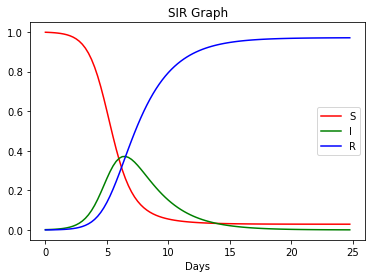

In [263]:
#plotting with matplotlib library on the same graph
plt.plot(arr,S,color='r', label='S')
plt.plot(arr,I,color='g', label='I')
plt.plot(arr,R,color='b', label='R')

plt.xlabel("Days")
plt.ylabel("")
plt.title("SIR Graph")
plt.legend()
plt.show()

In [264]:
#maximum I and its position
max_I = np.amax(I)
print(max_I,'\n',np.argmax(I))


0.3713115988458706 
 26


In [265]:
#To find  the time duration (from t = 0) for the disease to reach 1% of the maximum I (after crossing the maximum).
day = 0 
for j in range(27,step):
    if I[j] < 0.01*max_I :
        day = (j-1)*0.25
        break
print('The Infected population will reach 1% of the maximum infected population after',day,'day')

The Infected poppulation will reach 1% of the maximum infected population after 19.25 day


# END